## Image Classification with Deep Learning Project#4

* Student name: ***Aysu Erdemir***
* Student pace: ***Flex***
* Scheduled project review date/time: ***January, 2023***
* Instructor name: ***Abhineet Kulkarni***

## Overview

- **CDC wants to understand the leading factors in determining whether a person would take the sesoanal flu vaccine so that they could focus on the right strategies for their public efforts and vaccination campaigns to educate the public, raise awareness and maximize vaccine intake.**


- They also want to know the likelihood to receive the seasonal flu vaccine for specific demographic groups and have feedback about whether their efforts are successfull. 


- My goal is build a classifier to predict seasonal flu vaccination status using information they shared about their backgrounds, opinions, and health behaviors. My main purpose was to make predictions as accurately as possible while maximizing true positive (sensitivity) and true negative rates (specificity).

## Business and Data Understanding
* The data was obtained from the **National 2009 H1N1 Flu Survey** provided at [DrivenData](https://www.drivendata.org/competitions/66/flu-shot-learning/). This phone survey asked people whether they had received H1N1 and seasonal flu vaccines, in conjunction with information they shared about their lives, opinions, and behaviors. 


* In this project I will be focusing on `seasonal flu` only and information regarding individuals' opinions about the H1N1 vaccine were excluded from the analyses. The relevant variables/features included in the dataset are:

**Target Feature**: 
* `seasonal_vaccine` - Whether respondent received seasonal flu vaccine or not.

**Predictive Features**:

* `behavioral_antiviral_meds` - Has taken antiviral medications. (binary)
* `behavioral_avoidance` - Has avoided close contact with others with flu-like symptoms. (binary)
* `behavioral_face_mask` - Has bought a face mask. (binary)
* `behavioral_wash_hands` - Has frequently washed hands or used hand sanitizer. (binary)
* `behavioral_large_gatherings` - Has reduced time at large gatherings. (binary)
* `behavioral_outside_home` - Has reduced contact with people outside of own household. (binary)
* `behavioral_touch_face` - Has avoided touching eyes, nose, or mouth. (binary)
* `doctor_recc_seasonal` - Seasonal flu vaccine was recommended by doctor. (binary)
* `chronic_med_condition` - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
* `child_under_6_months` - Has regular close contact with a child under the age of six months. (binary)
* `health_worker` - Is a healthcare worker. (binary)
* `health_insurance` - Has health insurance. (binary)
* `opinion_seas_vacc_effective` - Respondent's opinion about seasonal flu vaccine effectiveness. 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
* `opinion_seas_risk` - Respondent's opinion about risk of getting sick with seasonal flu without vaccine. 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
* `opinion_seas_sick_from_vacc` - Respondent's worry of getting sick from taking seasonal flu vaccine. 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried. 
* `age_group` - Age group of respondent.
* `education` - Self-reported education level.
* `race` - Race of respondent.
* `sex` - Sex of respondent.
* `income_poverty` - Household annual income of respondent with respect to 2008 Census poverty thresholds.
* `marital_status` - Marital status of respondent.
* `rent_or_own` - Housing situation of respondent.
* `employment_status` - Employment status of respondent.
* `hhs_geo_region` - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
* `census_msa` - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
* `household_adults` - Number of other adults in household, top-coded to 3.
* `household_children` - Number of children in household, top-coded to 3.
* `employment_industry` - Type of industry respondent is employed in. Values are represented as short random character strings.
* `employment_occupation` - Type of occupation of respondent. Values are represented as short random character strings.


## Modeling

1. The data was split into training and test sets.
2. The data was pre-processed. 
3. Several types of classifiers were built, tuned (using GridSearchCV to test combinations of hyperparameters) and validated:

    - Logistic Regression
    - Decision Tree
    - Random Forest
    - XGradient Boosted
    - Stacking Classifier (using above models)


## Evaluation

4. Roc_Auc was used as the scoring metric for tuning hyperparameters and evaluating model performance. 

    * The Roc_Auc metric utilizes **"probabilities"** of class prediction. Based on that, we’re able to more precisely evaluate and compare the models.
    * We also care equally about positive and negative classes, and the roc curve gives a desirable balance between **sensitivity/recall (maximizing True positive Rate)** and and **1 - specificity (minimizing False Positive Rate -Probability that a true negative will test positive)**.
    * Our focus is not just good predictions, but we want to delve deeper and understand feature importance and model characteristics. Because of this we will check out metrics on both train and test sets.


In [62]:
# Import required packages

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

import matplotlib as mpl
import matplotlib.ticker as mticker

from sklearn.datasets import load_sample_images
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.regularizers import l2
from keras.optimizers import SGD
from keras.wrappers import scikit_learn
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator


import warnings
warnings.filterwarnings('ignore')
      
import os

## Data Visualization

In [2]:
train_dir = "Data/chest_xray/train/"
val_dir = "Data/chest_xray/val/"
test_dir ="Data/chest_xray/test/" 

person63_bacteria_306.jpeg
----------------------------
[[210 208 206 ... 213 215 216]
 [210 208 206 ... 213 216 217]
 [210 208 205 ... 213 216 218]
 ...
 [ 16  15  14 ...  47  47  47]
 [ 16  15  14 ...  46  46  46]
 [ 16  15  14 ...  46  46  46]]
(736, 1048)
----------------------------
255
0


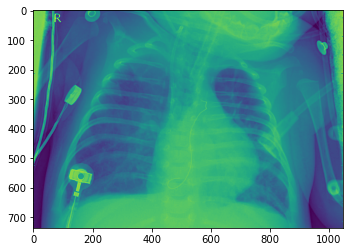

In [3]:
pneumonia = os.listdir(train_dir+'/PNEUMONIA')
#train_pneumonia_dir = "Data/chest_xray/train/PNEUMONIA"

# Combine the image directory with the specific jpeg to be able to locate it
# Read an image from a file into an array.
sample_img = plt.imread(os.path.join(train_dir+'/PNEUMONIA', pneumonia[0]))

print(pneumonia[0])
print("----------------------------")
print(sample_img)
print(sample_img.shape) # width and height
print("----------------------------")
print(sample_img.max())
print(sample_img.min())

# Display the image
plt.imshow(sample_img);

The dimensions of the image are 2234 pixels width and 2359 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000

### Visualise a few normal and pneunomia x-rays:

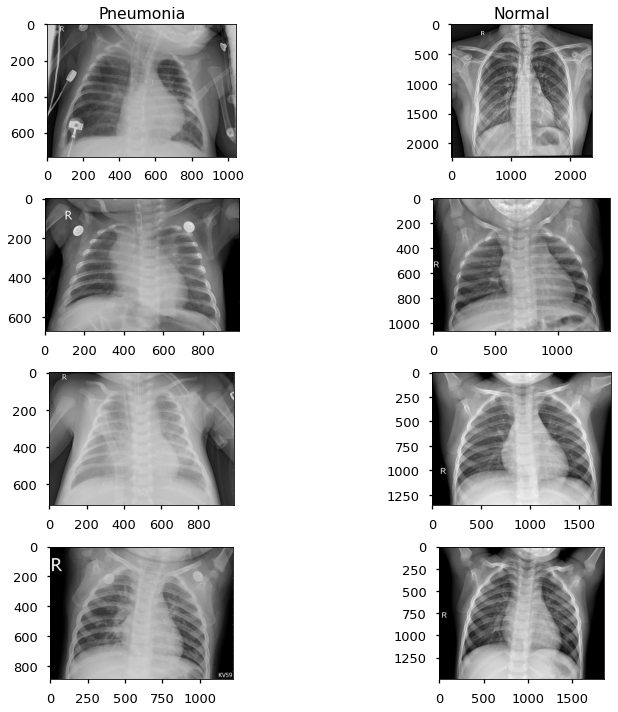

In [4]:
# Specify the set of images inside pnemonia and normal 
pneumonia = os.listdir("Data/chest_xray/train/PNEUMONIA")
normal = os.listdir("Data/chest_xray/train/NORMAL")

# Specify the location of the files = the directory
pneumonia_dir = "Data/chest_xray/train/PNEUMONIA"
normal_dir = "Data/chest_xray/train/NORMAL"

# Show the first four pictures from the train set of X-rays with and with/o Pneumonia 
with plt.style.context('seaborn-talk'):
    fig, ax = plt.subplots(4, 2, figsize=(12,10))  
    for i in range(4):
        # Combine the image directory with the specific jpeg to be able to locate it
        # Read the image from a file into an array.
        img_pneumonia = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
        img_normal = plt.imread(os.path.join(normal_dir, normal[i]))
        # Display the image
        ax[i,0].imshow(img_pneumonia, cmap='gray')
        ax[i,1].imshow(img_normal, cmap='gray')
        
        ax[0,0].set_title("Pneumonia")
        ax[0,1].set_title("Normal")
        # plt.axis('off')
plt.tight_layout()

## Look at total number of images for train-test-val and class imbalance of training data

Train Pneumomia: 3876
Train Normal: 1342
-------------------
Test Pneumomia: 390
Test Normal: 234
--------------------
Val Pneumomia: 9
Val Normal: 9
--------------------


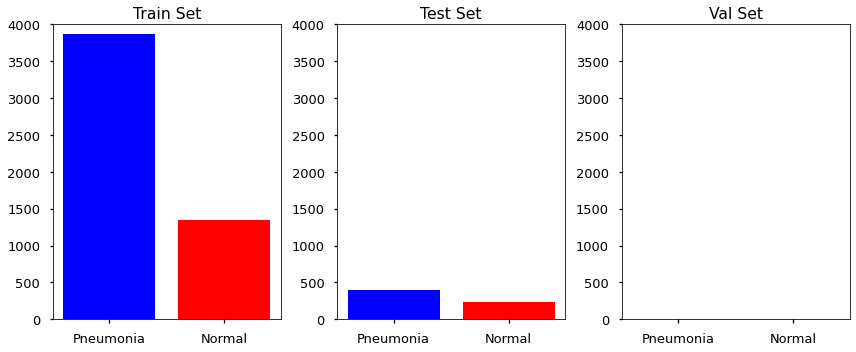

In [5]:
num_pneumonia_train = (len(os.listdir("Data/chest_xray/train/PNEUMONIA")) ) 
num_normal_train = (len(os.listdir("Data/chest_xray/train/NORMAL")) )
                       
num_pneumonia_test = (len(os.listdir("Data/chest_xray/test/PNEUMONIA")) )
num_normal_test = (len(os.listdir("Data/chest_xray/test/NORMAL")) )
      
num_pneumonia_val = (len(os.listdir("Data/chest_xray/val/PNEUMONIA")) )
num_normal_val = (len(os.listdir("Data/chest_xray/val/NORMAL")))
                             
with plt.style.context('seaborn-talk'):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
    ax1.bar(x = ["Pneumonia","Normal"], height=[num_pneumonia_train, num_normal_train], color=["blue", "red"])
    ax1.set_title('Train Set')
    ax2.bar(x = ["Pneumonia","Normal"], height=[num_pneumonia_test, num_normal_test], color=["blue", "red"])
    ax2.set_title('Test Set')
    ax3.bar(x = ["Pneumonia","Normal"], height=[num_pneumonia_val, num_normal_val], color=["blue", "red"]) 
    ax3.set_title('Val Set')
    
    ax1.set_ylim([0, 4000])
    ax2.set_ylim([0, 4000])
    ax3.set_ylim([0, 4000])
    plt.tight_layout()
    
print(f"Train Pneumomia: {num_pneumonia_train}")
print(f"Train Normal: {num_normal_train}")
print("-------------------")
print(f"Test Pneumomia: {num_pneumonia_test}")
print(f"Test Normal: {num_normal_test}")
print("--------------------")
print(f"Val Pneumomia: {num_pneumonia_val}")
print(f"Val Normal: {num_normal_val}")
print("--------------------")
            

https://pypi.org/project/split-folders/

In [6]:
# !pip install split-folders

In [7]:
import splitfolders

# 2 Re-run the test val train split, originally same number of images for the val set, now same kind of proportion.
# Your total number of train images should be divisible with the batch number? That is why I chose 31. OK?

In [8]:
# Change the size of Test and Val sets. 
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("Data/INPUT", output="Data/OUTPUT",
    seed=1337, ratio=(.8, .05, .15), group_prefix=None, move=False) # default values

Copying files: 5856 files [00:08, 660.33 files/s] 


Train Pneumomia: 3418
Train Normal: 1266
-------------------
Test Pneumomia: 642
Test Normal: 238
--------------------
Val Pneumomia: 213
Val Normal: 79
--------------------


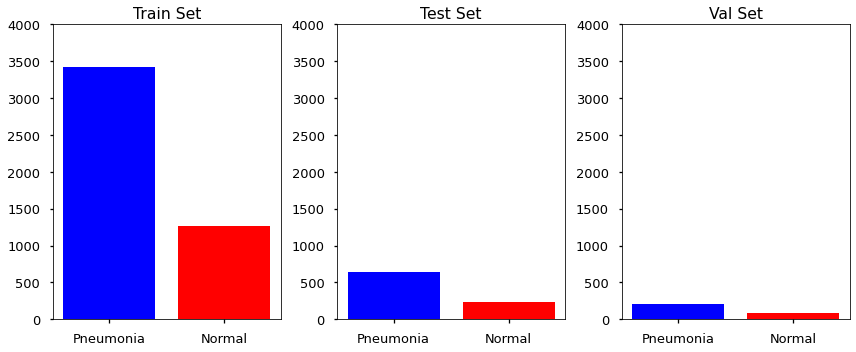

In [9]:
num_pneumonia_train = (len(os.listdir("Data/OUTPUT/train/PNEUMONIA")) ) 
num_normal_train = (len(os.listdir("Data/OUTPUT/train/NORMAL")) )
                       
num_pneumonia_test = (len(os.listdir("Data/OUTPUT/test/PNEUMONIA")) )
num_normal_test = (len(os.listdir("Data/OUTPUT/test/NORMAL")) )
      
num_pneumonia_val = (len(os.listdir("Data/OUTPUT/val/PNEUMONIA")) )
num_normal_val = (len(os.listdir("Data/OUTPUT/val/NORMAL")))
                             
with plt.style.context('seaborn-talk'):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
    ax1.bar(x = ["Pneumonia","Normal"], height=[num_pneumonia_train, num_normal_train], color=["blue", "red"])
    ax1.set_title('Train Set')
    ax2.bar(x = ["Pneumonia","Normal"], height=[num_pneumonia_test, num_normal_test], color=["blue", "red"])
    ax2.set_title('Test Set')
    ax3.bar(x = ["Pneumonia","Normal"], height=[num_pneumonia_val, num_normal_val], color=["blue", "red"]) 
    ax3.set_title('Val Set')
    
    ax1.set_ylim([0, 4000])
    ax2.set_ylim([0, 4000])
    ax3.set_ylim([0, 4000])
    plt.tight_layout()
    
print(f"Train Pneumomia: {num_pneumonia_train}")
print(f"Train Normal: {num_normal_train}")
print("-------------------")
print(f"Test Pneumomia: {num_pneumonia_test}")
print(f"Test Normal: {num_normal_test}")
print("--------------------")
print(f"Val Pneumomia: {num_pneumonia_val}")
print(f"Val Normal: {num_normal_val}")
print("--------------------")
      
          

In [10]:
train_dir = "Data/OUTPUT/train/"
val_dir = "Data/OUTPUT/val/"
test_dir ="Data/OUTPUT/test/" 

## Image Preprocessing:

### Data Normalization
For images, a common thing that is done is to make sure each pixel value is between 0 and 1. This can be done by dividing the entire matrix by 255. Do this here for the train_img_unrow and test_img_unrow.

MLPs take their input as vectors, not matrices or tensors.
If all of the images were different sizes, then we would have a more significant problem on our hands, because we'd have challenges getting each image reshaped into a vector the exact same size as our input layer. This means that we can just concatenate each row (or column) into a single 784-dimensional vector! 



Note that in the test generator we only want to rescale the data and set the validation split, as augmenting the images is only beneficial for training the model and may decrease test performance.

In general, the resolutions for training CNNs usually range between 64 × 64 and 256 × 256.

In [11]:
TrainTotal = num_pneumonia_train + num_normal_train
TestTotal = num_pneumonia_test + num_normal_test
ValTotal = num_pneumonia_val + num_normal_val

print(f"Train Images Total#: {TrainTotal}")
print(f"Test Images Total#: {TestTotal}")
print(f"Val Images Total#: {ValTotal}")

Train Images Total#: 4684
Test Images Total#: 880
Val Images Total#: 292


In [12]:
# For example, if you have 1000 images in your dataset and the batch size is defined as 10. 
# Then the "ImageDataGenerator" will produce 10 images in each iteration of the training.

# Each pixel is originally between 255 and 0, Rescale the datato be between 0 and 1. 
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale=1/255)

# Target Size: 256, 256: The dimensions to which all images found will be resized

# Train Images Total#: 4684
# Test Images Total#: 880
# Val Images Total#: 292

# get the data from the training directory
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(128, 128),
                                                    batch_size=4684, # default is 32
                                                    class_mode='binary',
                                                    color_mode= "grayscale",
                                                    shuffle=True)

# get the test data from the validation directory
test_generator = test_datagen.flow_from_directory(test_dir,
                                                target_size=(128, 128),
                                                batch_size=880,
                                                class_mode='binary',
                                                color_mode= "grayscale",
                                                shuffle=True)

# get the validation data from the validation directory
val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(128, 128),
                                                batch_size=292,
                                                class_mode='binary',
                                                color_mode= "grayscale",
                                                shuffle=True)

print(train_generator.class_indices)

Found 4684 images belonging to 2 classes.
Found 880 images belonging to 2 classes.
Found 292 images belonging to 2 classes.
{'NORMAL': 0, 'PNEUMONIA': 1}


In [13]:
train_generator.image_shape, test_generator.image_shape, val_generator.image_shape

((128, 128, 1), (128, 128, 1), (128, 128, 1))

In [14]:
# Create data sets
# next() returns the next item in an iterator = The first batch of 32 images
train_image, train_label = next(train_generator)
test_image, test_label = next(test_generator)
val_image, val_label = next(val_generator)

In [15]:
128 *128

16384

In [16]:
train_image[0]

array([[[0.07843138],
        [0.1137255 ],
        [0.20392159],
        ...,
        [0.26666668],
        [0.22352943],
        [0.15686275]],

       [[0.07058824],
        [0.12156864],
        [0.17254902],
        ...,
        [0.2901961 ],
        [0.23529413],
        [0.13725491]],

       [[0.07450981],
        [0.11764707],
        [0.20000002],
        ...,
        [0.30588236],
        [0.23529413],
        [0.14509805]],

       ...,

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]], dtype=float32)

In [17]:
print(train_image.shape)
print(train_label.shape)

(4684, 128, 128, 1)
(4684,)


In [18]:
train_image.shape[2]

128

In [19]:
train_label

array([1., 1., 0., ..., 1., 1., 1.], dtype=float32)

In [20]:
# Reshape images
# a.reshape(shape, order='C')

X_train = train_image.reshape(train_image.shape[0], -1)
X_test = test_image.reshape(test_image.shape[0], -1)
X_val = val_image.reshape(val_image.shape[0], -1)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(4684, 16384)
(880, 16384)
(292, 16384)


In [21]:
# Reshape labels
# y_train2 = train_label.reshape(train_label.shape[0], 1)
y_train = np.reshape(train_label, (4684,1)) # not order but new shape inside paranthesis?
y_test = np.reshape(test_label, (880,1))
y_val = np.reshape(val_label, (292,1))

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(4684, 1)
(880, 1)
(292, 1)


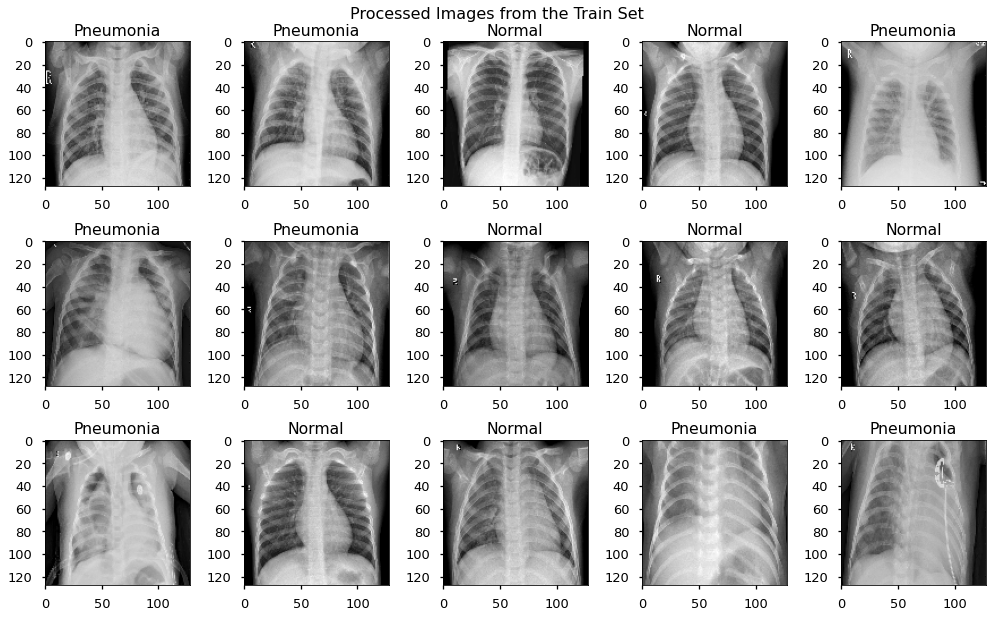

In [22]:
#  visualizing few images from training dataset
plt.figure(figsize=(14,14))

# img, label = next(train_generator)
with plt.style.context('seaborn-talk'):
    for i in range(15):
        ax = plt.subplot(5,5,i+1) # This is object oriented and different from plt.subplots() 
        plt.imshow(train_image[i], cmap='gray')
        if train_label[i]==0:
            plt.title("Normal")
        else:
            plt.title("Pneumonia")

plt.suptitle('Processed Images from the Train Set',fontsize=16)
plt.tight_layout()
plt.show()

In [23]:
model = models.Sequential()

# Add dense layers with relu activation
model.add(layers.Dense(5, activation='relu', input_shape = (16384,))) 
# Add final layer with sigmoid activation
model.add(layers.Dense(1, activation='sigmoid')) 

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 81925     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 81,931
Trainable params: 81,931
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Fit model set epochs to ensure convergence
BaselineNN = model.fit(X_train, y_train, epochs = 50, batch_size = 32, verbose =0, 
                    validation_data = (X_val, y_val))

In [26]:
# Because a traditional Neural Network and CNN uses different datatypes for the input images and how accuracy metrics are reported 
# we also need to specify, Xtrain, Xtest, accuracy and valaccuracy for the function below to be generalizable:

def visualize_training_results(result, Xtrainname, Xtestname, accuracy, valaccuracy):
    
    with plt.style.context('seaborn-talk'):
        
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
        ax1.plot(result.history['loss'])
        ax1.plot(result.history['val_loss'])
        ax1.set_title("Loss")
        ax1.legend(labels = ['train loss', 'val loss'])
        ax2.plot(result.history[accuracy])
        ax2.plot(result.history[valaccuracy])
        ax2.legend(labels = ['train acc', 'val acc'])
        ax2.set_title('Accuracy')

        # Output (probability) predictions for the test set 
        y_hat_test = result.model.predict(Xtestname)
        y_pred = np.rint(y_hat_test).astype(np.int) # Round elements of the array to the nearest integer.
        y_true = y_test.astype(np.int)
    
        # Generate a confusion matrix displaying the performance of the model
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['1', '0'])
        disp.plot(cmap = "Blues", ax=ax3)
        ax3.set_title('Confusion Matrix - TestSet')

        print('Classification Report:')
        print(classification_report(y_true, y_pred))
        print('\n')

        train_loss, train_acc = result.model.evaluate(Xtrainname, y_train);
        test_loss, test_acc = result.model.evaluate(Xtestname, y_test);
        print('--------------------------')
        print(f'Final Train Loss: {np.round(train_loss,4)}')
        print(f'Final Test Loss: {np.round(test_loss,4)}') 
        print('--------------------------')
        print(f'Final Train Acc: {np.round(train_acc,4)}')
        print(f'Final Test Acc: {np.round(test_acc,4)}') 
        print('\n')

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       238
           1       0.73      1.00      0.84       642

    accuracy                           0.73       880
   macro avg       0.36      0.50      0.42       880
weighted avg       0.53      0.73      0.62       880



28/28 [==============================] - 0s 800us/step - loss: 0.5837 - accuracy: 0.7295
--------------------------
Final Train Loss: 0.5835
Final Test Loss: 0.5837
--------------------------
Final Train Acc: 0.7297
Final Test Acc: 0.7295




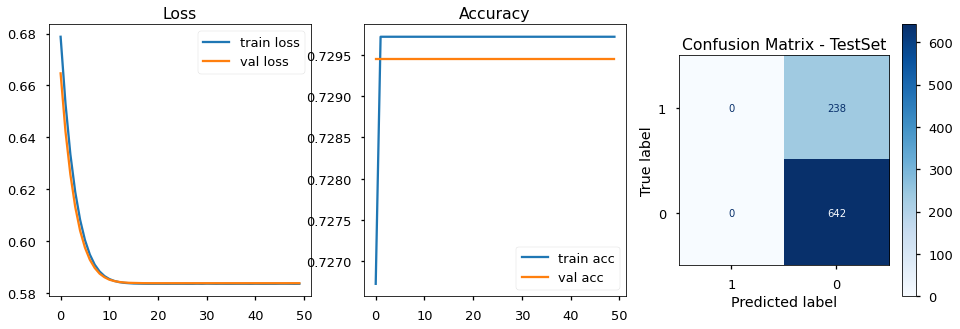

In [27]:
visualize_training_results(BaselineNN, X_train, X_test, "accuracy", "val_accuracy")

##  Build a Bigger/Deeper Neural Network

In [28]:
model = models.Sequential()

# Add dense layers with relu activation
model.add(layers.Dense(64, activation='relu', input_shape = (16384,)))

model.add(layers.Dense(32, activation='relu')) 
model.add(layers.Dense(10, activation='relu')) 

# Add final layer with sigmoid activation
model.add(layers.Dense(1, activation='sigmoid')) 

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [29]:
# Fit model set epochs to ensure convergence
BiggerNN = model.fit(X_train, y_train, epochs = 50, batch_size = 32, verbose = 0,
                    validation_data = (X_val, y_val))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       238
           1       0.97      0.93      0.95       642

    accuracy                           0.93       880
   macro avg       0.91      0.93      0.92       880
weighted avg       0.94      0.93      0.94       880



28/28 [==============================] - 0s 1ms/step - loss: 0.1909 - accuracy: 0.9341
--------------------------
Final Train Loss: 0.0869
Final Test Loss: 0.1909
--------------------------
Final Train Acc: 0.9656
Final Test Acc: 0.9341




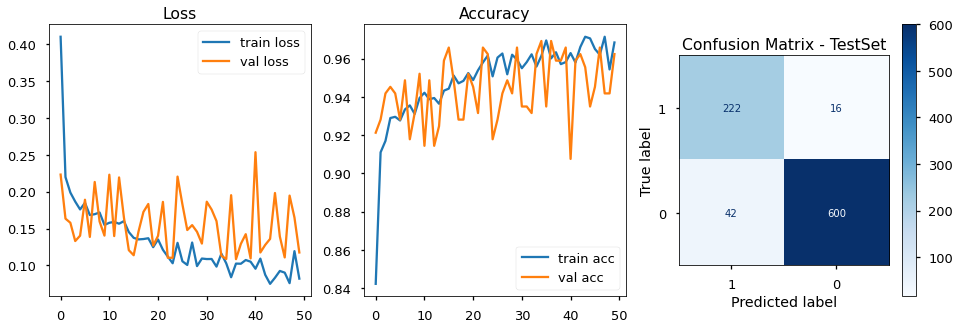

In [30]:
visualize_training_results(BiggerNN, X_train, X_test, "accuracy", "val_accuracy")

#  Weighted NN - use class weights due to inbalance?



In [31]:
pneumonia = os.listdir("Data/chest_xray/train/PNEUMONIA")
normal = os.listdir("Data/chest_xray/train/NORMAL")

weight_normal = len(normal)/(len(normal) + len(pneumonia))
weight_pneumonia = len(pneumonia)/(len(normal) + len(pneumonia))

print(len(pneumonia), len(normal))
print(f'Weight for class pneumonia: {np.round(weight_normal, 2)}')
print(f'Weight for class normal: {np.round(weight_pneumonia, 2)}')
    

3876 1342
Weight for class pneumonia: 0.26
Weight for class normal: 0.74


In [32]:
weights_dict = {0:np.round(weight_pneumonia, 2) , 1: np.round(weight_normal, 2)}
weights_dict

{0: 0.74, 1: 0.26}

In [33]:
weightedNN = model.fit(X_train, y_train, epochs = 50, batch_size = 32, verbose = 0,
                    validation_data = (X_val, y_val), class_weight = weights_dict)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.83       238
           1       0.91      0.99      0.95       642

    accuracy                           0.92       880
   macro avg       0.94      0.86      0.89       880
weighted avg       0.92      0.92      0.92       880



28/28 [==============================] - 0s 1ms/step - loss: 0.4063 - accuracy: 0.9205
--------------------------
Final Train Loss: 0.1377
Final Test Loss: 0.4063
--------------------------
Final Train Acc: 0.9477
Final Test Acc: 0.9205




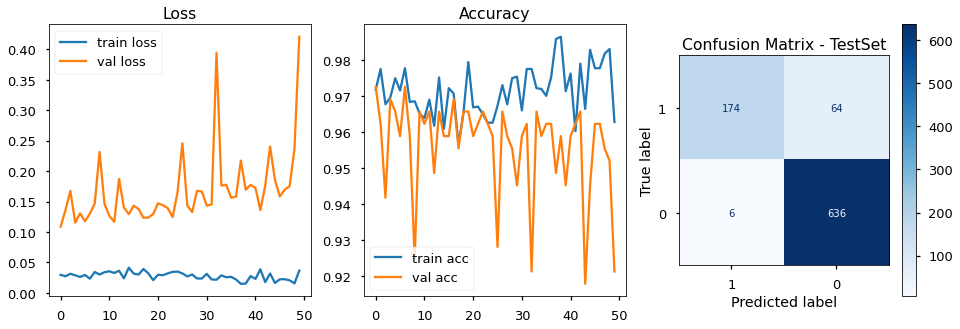

In [34]:
visualize_training_results(weightedNN, X_train, X_test, "accuracy", "val_accuracy")

# Baseline CNN

Architechture of the CNN

Baseline model with 3 convolutional layers, 3 max pooling layers, and one fully connected layer

32 is number of filters

Layers early in the network architecture (i.e., closer to the actual input image) learn fewer convolutional filters while layers deeper in the network (i.e., closer to the output predictions) will learn more filters.


So, how should you choose your filter_size ?

First, examine your input image — is it larger than 128×128?
If so, consider using a 5×5 or 7×7 kernel to learn larger features and then quickly reduce spatial dimensions — then start working with 3×3 kernels:

If your images are smaller than 128×128 you may want to consider sticking with strictly 1×1 and 3×3 filters.

model.add(Conv2D(32, (7, 7), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))


steps_per_epoch the number of batch iterations before a training epoch is considered finished. 

If you have a training set of fixed size you can ignore it. 


validation_steps similar to steps_per_epoch but on the validation data set 

instead on the training data. If you have the time to go through your whole validation data set I recommend to skip this parameter.


epochs=20,
steps_per_epoch = train sample 5216 / batch size 4 = 1304
validation_steps = validation sample 16 / batch size 4 = 4

In [35]:
model = Sequential()

# 1st Convolution and Pooling
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 1))) 
model.add(MaxPool2D(pool_size = (2, 2)))  

# 2nd Convolution and Pooling
model.add(Conv2D(32, (3, 3), activation='relu')) 
model.add(MaxPool2D(pool_size = (2, 2))) 

# Flatten
model.add(Flatten())

# Include a fully-connected layer and an output layer
model.add(Dense(activation = 'relu', units = 32)) # inner layer
model.add(Dense(activation = 'sigmoid', units = 1)) # output layer

# Compile model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                921632    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [36]:
# Train the model
BaselineCNN = model.fit(train_image, y_train, epochs = 50, batch_size=32,
                    validation_data = (val_image, y_val) )  

Epoch 1/50
147/147 [==============================] - 17s 117ms/step - loss: 0.2651 - acc: 0.8879 - val_loss: 0.1594 - val_acc: 0.9315
Epoch 2/50
147/147 [==============================] - 17s 116ms/step - loss: 0.1526 - acc: 0.9415 - val_loss: 0.1473 - val_acc: 0.9349
Epoch 3/50
147/147 [==============================] - 17s 119ms/step - loss: 0.1288 - acc: 0.9532 - val_loss: 0.1683 - val_acc: 0.9349
Epoch 4/50
147/147 [==============================] - 17s 114ms/step - loss: 0.1194 - acc: 0.9573 - val_loss: 0.1362 - val_acc: 0.9486
Epoch 5/50
147/147 [==============================] - 17s 116ms/step - loss: 0.1020 - acc: 0.9631 - val_loss: 0.1550 - val_acc: 0.9349
Epoch 6/50
147/147 [==============================] - 17s 114ms/step - loss: 0.0943 - acc: 0.9629 - val_loss: 0.1390 - val_acc: 0.9555
Epoch 7/50
147/147 [==============================] - 17s 114ms/step - loss: 0.0805 - acc: 0.9729 - val_loss: 0.1657 - val_acc: 0.9486
Epoch 8/50
147/147 [==============================] - 1

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       238
           1       0.97      0.97      0.97       642

    accuracy                           0.96       880
   macro avg       0.95      0.95      0.95       880
weighted avg       0.96      0.96      0.96       880



28/28 [==============================] - 1s 22ms/step - loss: 0.3071 - acc: 0.9591
--------------------------
Final Train Loss: 0.0
Final Test Loss: 0.3071
--------------------------
Final Train Acc: 1.0
Final Test Acc: 0.9591




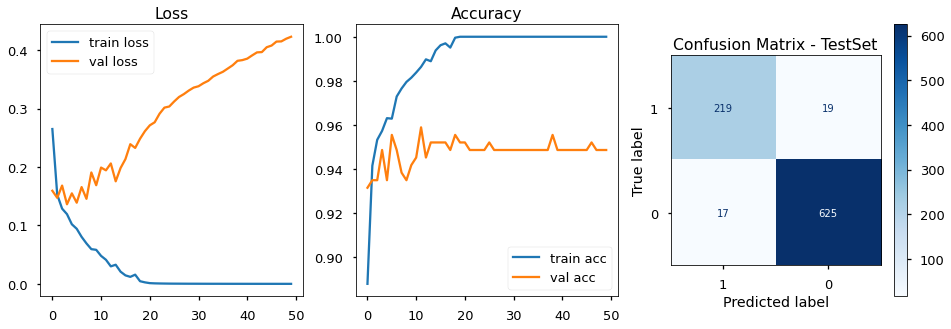

In [37]:
visualize_training_results(BaselineCNN, train_image, test_image, "acc", "val_acc")

## Deeper CNN

In [38]:
model = Sequential()

# 1st Convolution and Pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))  #input_shape=(128, 128,1)
model.add(MaxPool2D(pool_size = (2, 2)))  # 32 is number of filters

# 2nd Convolution and Pooling
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPool2D(pool_size = (2, 2)))

# 3rd Convolution and Pooling
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPool2D(pool_size = (2, 2)))

# Flatten
model.add(Flatten())

# activation
model.add(Dense(activation = 'relu', units = 128)) # inner layer
model.add(Dense(activation = 'relu', units = 64)) # inner layer
model.add(Dense(activation = 'sigmoid', units = 1)) # output layer

# Compile model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)            

In [39]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [40]:
BiggerCNN = model.fit(train_image, y_train, epochs = 50, batch_size=32,
                    validation_data = (val_image, y_val), callbacks = [early_stop])  

Epoch 1/50
147/147 [==============================] - 42s 283ms/step - loss: 0.2752 - acc: 0.8809 - val_loss: 0.1763 - val_acc: 0.9349
Epoch 2/50
147/147 [==============================] - 42s 283ms/step - loss: 0.1669 - acc: 0.9362 - val_loss: 0.1760 - val_acc: 0.9247
Epoch 3/50
147/147 [==============================] - 42s 283ms/step - loss: 0.1323 - acc: 0.9522 - val_loss: 0.1372 - val_acc: 0.9418
Epoch 4/50
147/147 [==============================] - 41s 280ms/step - loss: 0.1196 - acc: 0.9562 - val_loss: 0.1203 - val_acc: 0.9555
Epoch 5/50
147/147 [==============================] - 41s 281ms/step - loss: 0.1058 - acc: 0.9609 - val_loss: 0.1277 - val_acc: 0.9623
Epoch 6/50
147/147 [==============================] - 41s 280ms/step - loss: 0.0909 - acc: 0.9658 - val_loss: 0.1200 - val_acc: 0.9589
Epoch 7/50
147/147 [==============================] - 41s 280ms/step - loss: 0.0758 - acc: 0.9737 - val_loss: 0.1046 - val_acc: 0.9692
Epoch 8/50
147/147 [==============================] - 4

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       238
           1       0.96      0.98      0.97       642

    accuracy                           0.96       880
   macro avg       0.96      0.94      0.95       880
weighted avg       0.96      0.96      0.96       880



28/28 [==============================] - 2s 63ms/step - loss: 0.1651 - acc: 0.9580
--------------------------
Final Train Loss: 0.0396
Final Test Loss: 0.1651
--------------------------
Final Train Acc: 0.9846
Final Test Acc: 0.958




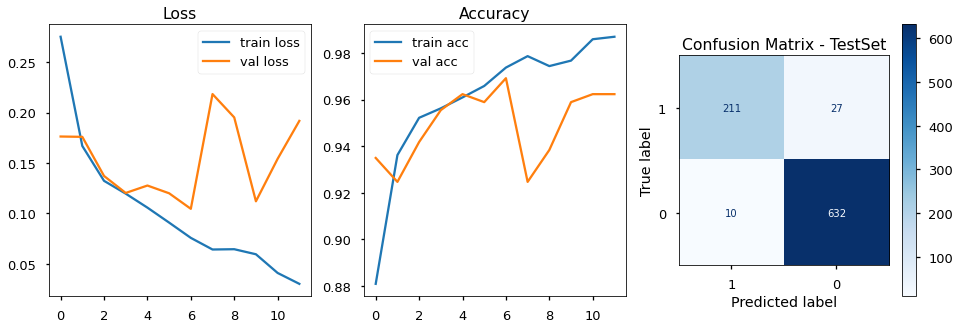

In [41]:
visualize_training_results(BiggerCNN, train_image, test_image, "acc", "val_acc")

# CNN with dropout regularization

In [42]:
model = Sequential()

# 1st Convolution and Pooling and dropout
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))  #input_shape=(128, 128,1)
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(layers.Dropout(0.4)) # regularization

# 2nd Convolution and Pooling
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(layers.Dropout(0.4)) # regularization

# 3rd Convolution and Pooling
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(layers.Dropout(0.4)) # regularization

# Flatten
model.add(Flatten())

model.add(Dense(activation = 'relu', units = 128)) # inner layer
model.add(layers.Dropout(0.2)) # regularization
model.add(Dense(activation = 'relu', units = 64)) # inner layer
model.add(layers.Dropout(0.2)) # regularization
model.add(Dense(activation = 'sigmoid', units = 1)) # output layer

# Compile model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)      

In [43]:
Dropout_CNN = model.fit(train_image, y_train, epochs=50, batch_size=32,
                    validation_data=(val_image, y_val), callbacks = [early_stop] )

Epoch 1/50
147/147 [==============================] - 46s 310ms/step - loss: 0.4115 - acc: 0.8158 - val_loss: 0.1984 - val_acc: 0.9178
Epoch 2/50
147/147 [==============================] - 45s 308ms/step - loss: 0.2104 - acc: 0.9210 - val_loss: 0.1935 - val_acc: 0.9384
Epoch 3/50
147/147 [==============================] - 46s 315ms/step - loss: 0.1676 - acc: 0.9394 - val_loss: 0.1562 - val_acc: 0.9452
Epoch 4/50
147/147 [==============================] - 46s 311ms/step - loss: 0.1503 - acc: 0.9477 - val_loss: 0.1692 - val_acc: 0.9384
Epoch 5/50
147/147 [==============================] - 45s 308ms/step - loss: 0.1286 - acc: 0.9520 - val_loss: 0.1483 - val_acc: 0.9418
Epoch 6/50
147/147 [==============================] - 45s 305ms/step - loss: 0.1267 - acc: 0.9528 - val_loss: 0.1375 - val_acc: 0.9452
Epoch 7/50
147/147 [==============================] - 45s 309ms/step - loss: 0.1227 - acc: 0.9545 - val_loss: 0.1202 - val_acc: 0.9555
Epoch 8/50
147/147 [==============================] - 4

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       238
           1       0.98      0.96      0.97       642

    accuracy                           0.95       880
   macro avg       0.94      0.95      0.94       880
weighted avg       0.95      0.95      0.95       880



28/28 [==============================] - 2s 61ms/step - loss: 0.1210 - acc: 0.9534
--------------------------
Final Train Loss: 0.058
Final Test Loss: 0.121
--------------------------
Final Train Acc: 0.9833
Final Test Acc: 0.9534




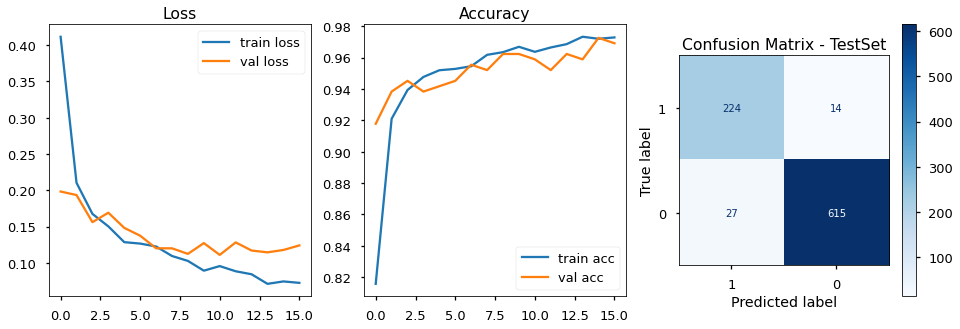

In [44]:
visualize_training_results(Dropout_CNN, train_image, test_image, "acc", "val_acc")

# CNN with drop out and weights

In [55]:
Weighted_CNN = model.fit(train_image, y_train, epochs=50, batch_size=32,
                    validation_data=(val_image, y_val), 
                         callbacks = [early_stop], class_weight = weights_dict)

Epoch 1/50
147/147 [==============================] - 44s 302ms/step - loss: 0.2075 - acc: 0.6187 - val_loss: 0.3630 - val_acc: 0.8630
Epoch 2/50
147/147 [==============================] - 45s 309ms/step - loss: 0.0935 - acc: 0.9069 - val_loss: 0.1966 - val_acc: 0.9315
Epoch 3/50
147/147 [==============================] - 46s 310ms/step - loss: 0.0729 - acc: 0.9302 - val_loss: 0.1691 - val_acc: 0.9349
Epoch 4/50
147/147 [==============================] - 44s 301ms/step - loss: 0.0623 - acc: 0.9441 - val_loss: 0.1391 - val_acc: 0.9521
Epoch 5/50
147/147 [==============================] - 45s 308ms/step - loss: 0.0558 - acc: 0.9443 - val_loss: 0.1421 - val_acc: 0.9486
Epoch 6/50
147/147 [==============================] - 46s 313ms/step - loss: 0.0568 - acc: 0.9443 - val_loss: 0.1310 - val_acc: 0.9589
Epoch 7/50
147/147 [==============================] - 44s 297ms/step - loss: 0.0497 - acc: 0.9507 - val_loss: 0.1581 - val_acc: 0.9418
Epoch 8/50
147/147 [==============================] - 4

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.98      0.87       238
           1       0.99      0.90      0.95       642

    accuracy                           0.92       880
   macro avg       0.89      0.94      0.91       880
weighted avg       0.94      0.92      0.93       880



28/28 [==============================] - 2s 63ms/step - loss: 0.2016 - acc: 0.9239
--------------------------
Final Train Loss: 0.1473
Final Test Loss: 0.2016
--------------------------
Final Train Acc: 0.9387
Final Test Acc: 0.9239




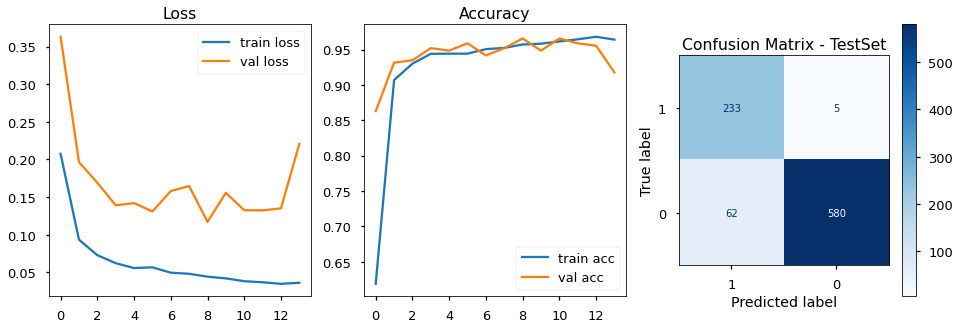

In [56]:
visualize_training_results(Weighted_CNN, train_image, test_image, "acc", "val_acc")

##  Batch regularization
it normalizes the input to your activation function, so that you're centered in the linear section of the activation function (such as Sigmoid)

In [59]:
model = Sequential()

# 1st Convolution and Pooling and dropout
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))  #input_shape=(128, 128,1)
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.4)) # regularization


# 2nd Convolution and Pooling
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.4)) # regularization

# 3rd Convolution and Pooling
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.4)) # regularization

# Flatten
model.add(Flatten())

model.add(Dense(activation = 'relu', units = 128)) # inner layer
model.add(BatchNormalization())
model.add(layers.Dropout(0.2)) # regularization

model.add(Dense(activation = 'relu', units = 64)) # inner layer
model.add(BatchNormalization())
model.add(layers.Dropout(0.2)) # regularization

model.add(Dense(activation = 'sigmoid', units = 1)) # output layer
model.add(BatchNormalization())

# Compile model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 63, 63, 32)        128       
_________________________________________________________________
dropout_40 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 30, 30, 64)      

In [60]:
BatchNorm_CNN = model.fit(train_image, y_train, epochs=50, batch_size=32,
                    validation_data=(val_image, y_val), 
                         callbacks = [early_stop], class_weight = weights_dict)

Epoch 1/50
147/147 [==============================] - 49s 332ms/step - loss: 0.9998 - acc: 0.6725 - val_loss: 0.7849 - val_acc: 0.7295
Epoch 2/50
147/147 [==============================] - 51s 350ms/step - loss: 0.7029 - acc: 0.7430 - val_loss: 0.8000 - val_acc: 0.7295
Epoch 3/50
147/147 [==============================] - 52s 352ms/step - loss: 0.6870 - acc: 0.7498 - val_loss: 11.2518 - val_acc: 0.2705
Epoch 4/50
147/147 [==============================] - 53s 362ms/step - loss: 0.5155 - acc: 0.7810 - val_loss: 5.2878 - val_acc: 0.3493
Epoch 5/50
 28/147 [====>.........................] - ETA: 39s - loss: 0.3869 - acc: 0.8348

KeyboardInterrupt: 

In [ ]:
visualize_training_results(BatchNorm_CNN, train_image, test_image, "acc", "val_acc")

# Learning Rate (α): how big of a step we take in gradient descent
Other optimizers, such as Adam ("Adaptive Moment Estimation"), update the weights in different ways. For Adam,											
	A learning rate is maintained for each network weight (parameter) and separately adapted as learning unfolds.
    
Why batches? If you push all your samples through at once, you have to wait until everything is processed and can only start backpropagating then.										

## L2 regularization

In [67]:
model = Sequential()

# 1st Convolution and Pooling and dropout
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))  #input_shape=(128, 128,1)
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.4)) # regularization


# 2nd Convolution and Pooling
model.add(Conv2D(64, (3, 3), activation="relu", kernel_regularizer=regularizers.l2(0.005)))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.4)) # regularization

# 3rd Convolution and Pooling
model.add(Conv2D(128, (3, 3), activation="relu", kernel_regularizer=regularizers.l2(0.005)))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.4)) # regularization

# Flatten
model.add(Flatten())

model.add(Dense(activation = 'relu', units = 128, kernel_regularizer=regularizers.l2(0.005))) # inner layer
model.add(BatchNormalization())
model.add(layers.Dropout(0.2)) # regularization

model.add(Dense(activation = 'relu', units = 64, kernel_regularizer=regularizers.l2(0.005))) # inner layer
model.add(BatchNormalization())
model.add(layers.Dropout(0.2)) # regularization

model.add(Dense(activation = 'sigmoid', units = 1)) # output layer
model.add(BatchNormalization())

# Compile model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 63, 63, 32)        128       
_________________________________________________________________
dropout_51 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 30, 30, 64)      

In [68]:
Regularization_CNN = model.fit(train_image, y_train, epochs=50, batch_size=32,
                    validation_data=(val_image, y_val), 
                         callbacks = [early_stop], class_weight = weights_dict)

Epoch 1/50
147/147 [==============================] - 67s 454ms/step - loss: 3.6781 - acc: 0.7092 - val_loss: 12.2718 - val_acc: 0.2705
Epoch 2/50
147/147 [==============================] - 57s 387ms/step - loss: 3.5072 - acc: 0.7797 - val_loss: 5.9146 - val_acc: 0.5856
Epoch 3/50
147/147 [==============================] - 53s 360ms/step - loss: 6.2307 - acc: 0.7242 - val_loss: 5.8700 - val_acc: 0.7123
Epoch 4/50
147/147 [==============================] - 75s 511ms/step - loss: 7.4328 - acc: 0.6847 - val_loss: 8.0785 - val_acc: 0.8219
Epoch 5/50
101/147 [===================>..........] - ETA: 15s - loss: 7.4943 - acc: 0.7590

KeyboardInterrupt: 

In [ ]:
visualize_training_results(Regularization_CNN, train_image, test_image, "acc", "val_acc")

# Increase batch size

In [ ]:
Regularization_CNN = model.fit(train_image, y_train, epochs=2, batch_size=64,
                    validation_data=(val_image, y_val), 
                         callbacks = [early_stop], class_weight = weights_dict)

In [ ]:
visualize_training_results(Regularization_CNN, train_image, test_image, "acc", "val_acc")

In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers
decayed_lr = tf.train.exponential_decay(learning_rate,
                                        global_step, 10000,
                                        0.95, staircase=True)
opt = tf.train.AdamOptimizer(decayed_lr, epsilon=adam_epsilon)


In [47]:
decayed_lr = tf.train.exponential_decay(learning_rate,
                                        global_step, 10000,
                                        0.95, staircase=True)
opt = tf.train.AdamOptimizer(decayed_lr, epsilon=adam_epsilon)

NameError: name 'tf' is not defined

In [53]:
optimizer=keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model.h5')
saved_model

saved_model.evaluate(train_image, test_image, verbose=0)
saved_model.evaluate(train_image, test_image, verbose=0)

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model.h5')
BiggerCNN = saved_model.evaluate(train_image, y_train)

In [ ]:
# use the hyperparameters that achieve the highest performance

learning_rate = 0.001
droprate = 0.8
size = 100


    model.add(layers.Dropout(droprate)) # regularization
    

    
    
    # optimization parameters
    optimizer=keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.8)
    loss='binary_crossentropy'
    model.compile(loss=loss,
                 optimizer=optimizer,
                 metrics=['acc'])
    return model

In [ ]:
!pip install h5py

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Architechture of the CNN
# Set up early stopping and learning rate reduction
# Patience= Number of epochs with no improvement after which training will be stopped.

# ModelCheckpoint callback is used in conjunction with training using model.fit() 
# to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

# checkpoint_filepath = '/tmp/checkpoint'

# Define stopping criterion
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True)
callbacks = [early_stop, model_checkpoint]

# Look at the FINAL Model Explanation
Look at the features of the image that are contributing to its class prediction

How to Visualize Filters and Feature Maps in Convolutional Neural Networks

In neural network terminology, the learned filters are simply weights, yet because of the specialized two-dimensional structure of the filters, the weight values have a spatial relationship to each other and plotting each filter as a two-dimensional image is meaningful (or could be).

Because each method adapts the learning rate, often one learning rate per model weight, little configuration is often required.Three commonly used adaptive learning rate methods include:
- RMSProp 
- Adagrad
- Adam

## Updated Model

Address the class imbalance using class weights
based on the results of the baseline model's confusion matrix, which shows the model is predicting mostly one class

Experiment with more epochs and early stopping
might prevent overfitting

Reduce batch size
might improve accuracy


Going off of iteration 2, I will try to rework the validation set size to see if it makes any improvements in the loss and accuracy curves.
results = mod3.fit(X_train,
                   y_train,
                   epochs=50,
                   batch_size=30,
                   validation_split=.2,
                   class_weight=weights_dict,
                   callbacks=callbacks)
                   
                   
In this iteration, I will deepen the neural network to include more layers to hopefully pull more features out of the images to improve the model
     

In [ ]:
# Define stopping criterion
early_stop = EarlyStopping(monitor='val_loss', patience=5)
# model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True)
callbacks = [early_stop]

In [ ]:
# Set random seed for reproducability

SEED = 123456
import os
import random as rn
import numpy as np
import tensorflow


tensorflow.random.set_seed(SEED)
os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
rn.seed(SEED)
python_random.seed(SEED)


## Recommendations

* Target physicians by educating them on the importance of vaccination &  recommending it to their patients!
* Target uninsured populations in the campaign, but better yet work on universal health coverage for all individuals and communities.
* Focus your campaign on informing the people about the effectiveness and safety of the vaccine or their risk of falling ill and developing complications if not vaccinated. 
* As a priority keep focusing your campaign on older age groups, because they are at more risk of developing flu-related complications compared to younger age groups. But also target younger people as a key demographic population since their vaccination rates are much lower.


## Next Steps

* Encrypted employment industry, employment occupation, and geographical region info, hard to make any specific suggestions based on these features. 
* Results on health insurance are not very reliable due to 40% of the data being null and being encoded using predictive modeling. More care needs to be given to this variable next time the survey is conducted since it is a significant feature in predicting vaccine outcome. 
* More recent data needs to be collected after the Covid-19 pandemic since the pandemic might have altered people’s attitude towards flu vaccine as well. 

**Exporting to PDF using nbconvert**:
1. install nbconvert: ! pip install nbconvert
2. install MacTeX from tps://tug.org/mactex/
3. ! export PATH=/Library/TeX/texbin:$PATH
4. ! jupyter nbconvert --to PDF NOTEBOOKNAME.ipynb